In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
# data import
d34 = pd.read_csv('data/d2324.csv')
d34.head() # 110 columns

,Unnamed: 0,id,revisit_num,satis_overall,satis_food,satis_shop,satis_nature,satis_history,satis_tradition,satis_gallery,...,info_collect,infra,activity,type,main_purpose,interest1,interest2,interest3,year,satisfaction
0,0,6,4,5,5.0,5.0,NaN,NaN,NaN,NaN,...,1.0,6.0,1.0,1,1,2.0,3.0,4.0,2023,8
1,1,7,4,5,NaN,5.0,5.0,NaN,NaN,NaN,...,3.0,3.0,3.0,1,2,2.0,9.0,7.0,2023,11
2,2,8,2,5,5.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,1,5,NaN,NaN,NaN,2023,1
3,3,10,1,5,NaN,NaN,NaN,5.0,NaN,NaN,...,4.0,NaN,NaN,1,3,NaN,NaN,NaN,2023,15
4,4,11,3,4,5.0,5.0,NaN,5.0,NaN,NaN,...,4.0,3.0,2.0,1,2,8.0,3.0,7.0,2023,2


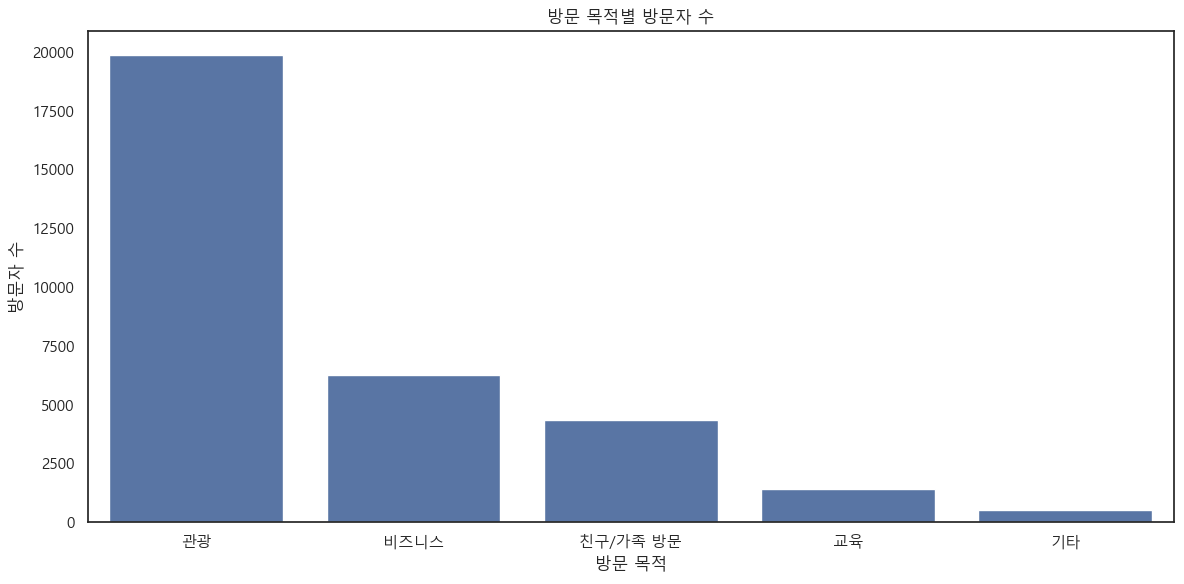

In [3]:
# 방문 목적
d34['purpose'].value_counts()

# purpose
# 여가: 19876
# 사업: 6275
# 방문: 4354
# 교육: 1401
# 기타: 506

purpose_rename = {
    1 : '관광',
    3 : '비즈니스',
    2 : '친구/가족 방문',
    4 : '교육',
    5 : '기타'
}

d34['purpose'] = d34['purpose'].replace(purpose_rename)

mpl.rcParams['font.family'] = ['Malgun Gothic']
mpl.rcParams['font.sans-serif'] = ['Malgun Gothic']
mpl.rcParams['axes.unicode_minus'] = False
sns.set(style="white", font='Malgun Gothic', rc={'axes.unicode_minus':False})

sns.countplot(x='purpose', data=d34, order=d34['purpose'].value_counts().index)
plt.title("방문 목적별 방문자 수", fontname='Malgun Gothic')
plt.xlabel("방문 목적", fontname='Malgun Gothic')
plt.ylabel("방문자 수", fontname='Malgun Gothic')
plt.tight_layout()
plt.show()

In [4]:
print(d34['purpose'].value_counts())
d34['main_purpose'].value_counts()

purpose
관광          19876
비즈니스         6275
친구/가족 방문     4354
교육           1401
기타            506
Name: count, dtype: int64


main_purpose
1    19876
3     6275
2     4354
4     1401
5      506
Name: count, dtype: int64

lack_info1
교통지정보       3898
맛집정보        2591
금융정보        2533
행사정보        2396
방문지정보       1832
통신이용정보      1747
쇼핑정보        1418
숙박정보        1191
한류문화체험정보     980
기타           224
Name: count, dtype: int64
lack_info2
교통지정보       1886
맛집정보        1819
행사정보        1595
방문지정보       1571
금융정보        1477
통신이용정보      1308
쇼핑정보        1116
숙박정보         888
한류문화체험정보     861
기타            47
Name: count, dtype: int64
lack_info3
방문지정보       1225
교통지정보       1205
맛집정보        1158
행사정보        1083
금융정보         978
통신이용정보       866
쇼핑정보         828
숙박정보         709
한류문화체험정보     677
기타            32
Name: count, dtype: int64


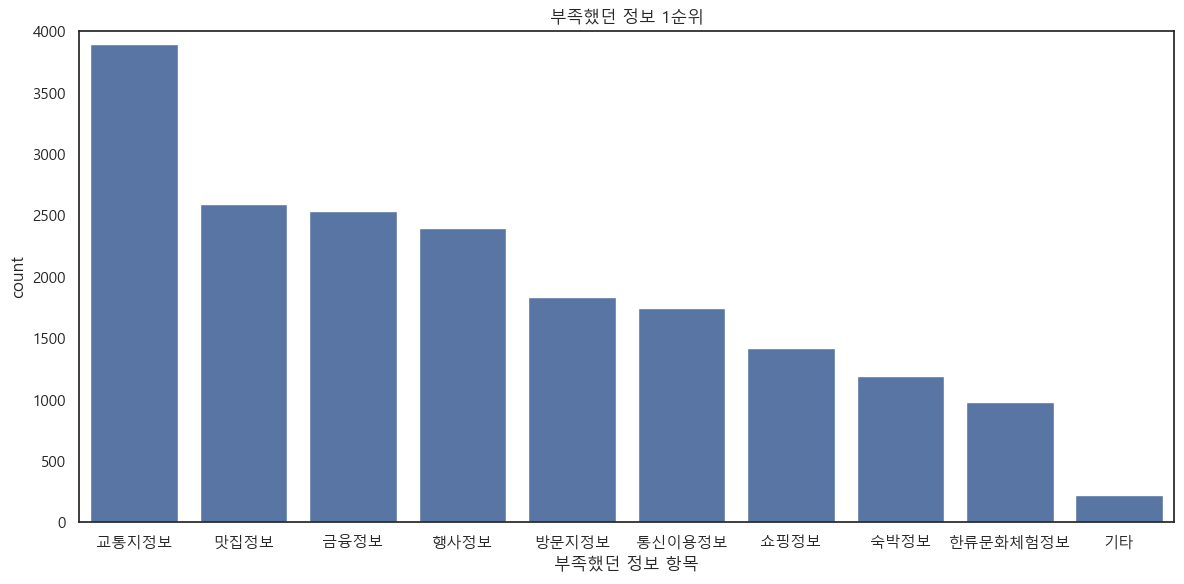

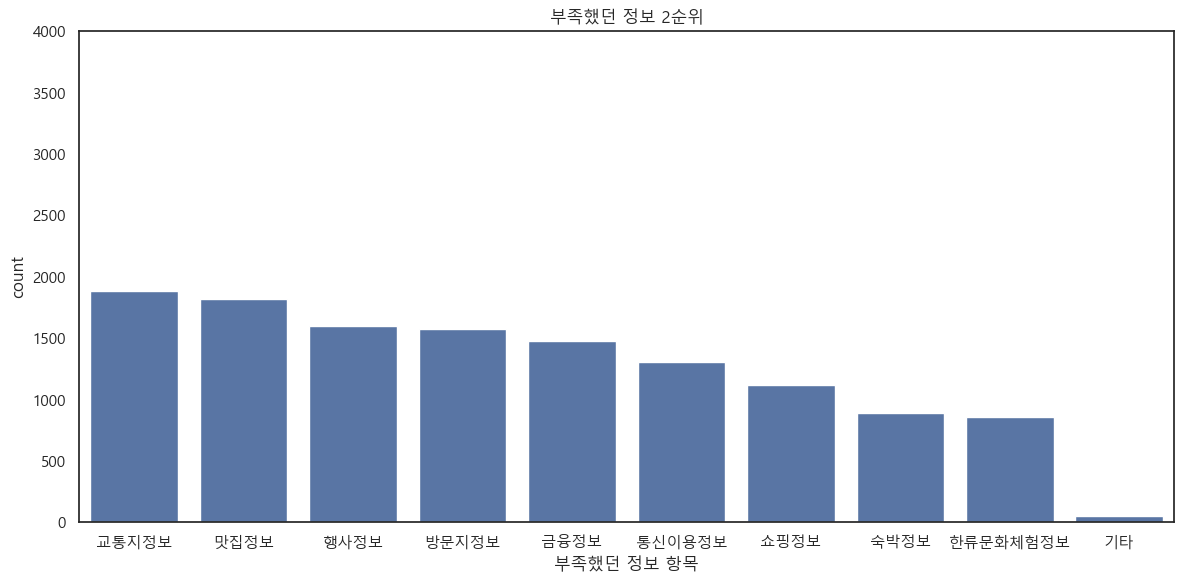

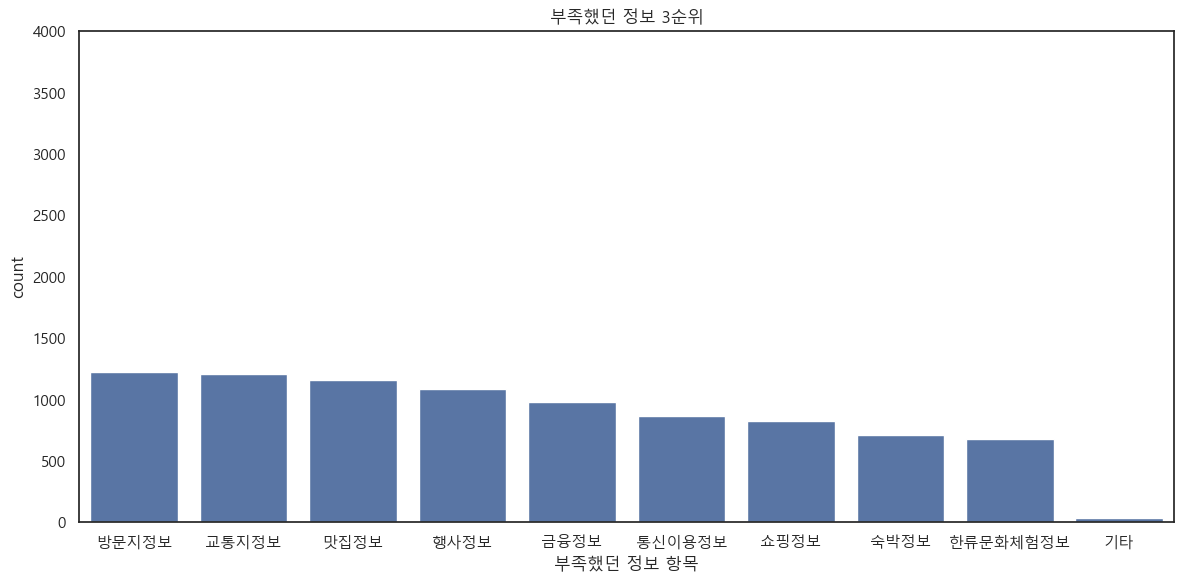

In [5]:
# 정보부족
lackinfo_rename = {
    1 : '방문지정보',
    2 : '교통지정보',
    3 : '맛집정보',
    4 : '쇼핑정보',
    5 : '숙박정보',
    6 : '행사정보',
    7 : '한류문화체험정보',
    8 : '금융정보',
    9 : '통신이용정보',
    10 : '기타',
    11: '없다'
}
d34['lack_info1'] = d34['lack_info1'].replace(lackinfo_rename)
d34['lack_info2'] = d34['lack_info2'].replace(lackinfo_rename)
d34['lack_info3'] = d34['lack_info3'].replace(lackinfo_rename)

print(d34['lack_info1'].value_counts())
print(d34['lack_info2'].value_counts())
print(d34['lack_info3'].value_counts())

mpl.rcParams['font.family'] = ['Malgun Gothic']
mpl.rcParams['font.sans-serif'] = ['Malgun Gothic']
mpl.rcParams['axes.unicode_minus'] = False
sns.set(style="white", font='Malgun Gothic', rc={'axes.unicode_minus':False})

sns.countplot(x='lack_info1', data=d34, order=d34['lack_info1'].value_counts().index)
plt.title("부족했던 정보 1순위", fontname='Malgun Gothic')
plt.xlabel("부족했던 정보 항목", fontname='Malgun Gothic')
plt.ylim(0, 4000)
plt.tight_layout()
plt.show()

sns.countplot(x='lack_info2', data=d34, order=d34['lack_info2'].value_counts().index)
plt.title("부족했던 정보 2순위", fontname='Malgun Gothic')
plt.xlabel("부족했던 정보 항목", fontname='Malgun Gothic')
plt.ylim(0, 4000)
plt.tight_layout()
plt.show()

sns.countplot(x='lack_info3', data=d34, order=d34['lack_info3'].value_counts().index)
plt.title("부족했던 정보 3순위", fontname='Malgun Gothic')
plt.xlabel("부족했던 정보 항목", fontname='Malgun Gothic')
plt.ylim(0, 4000)
plt.tight_layout()
plt.show()

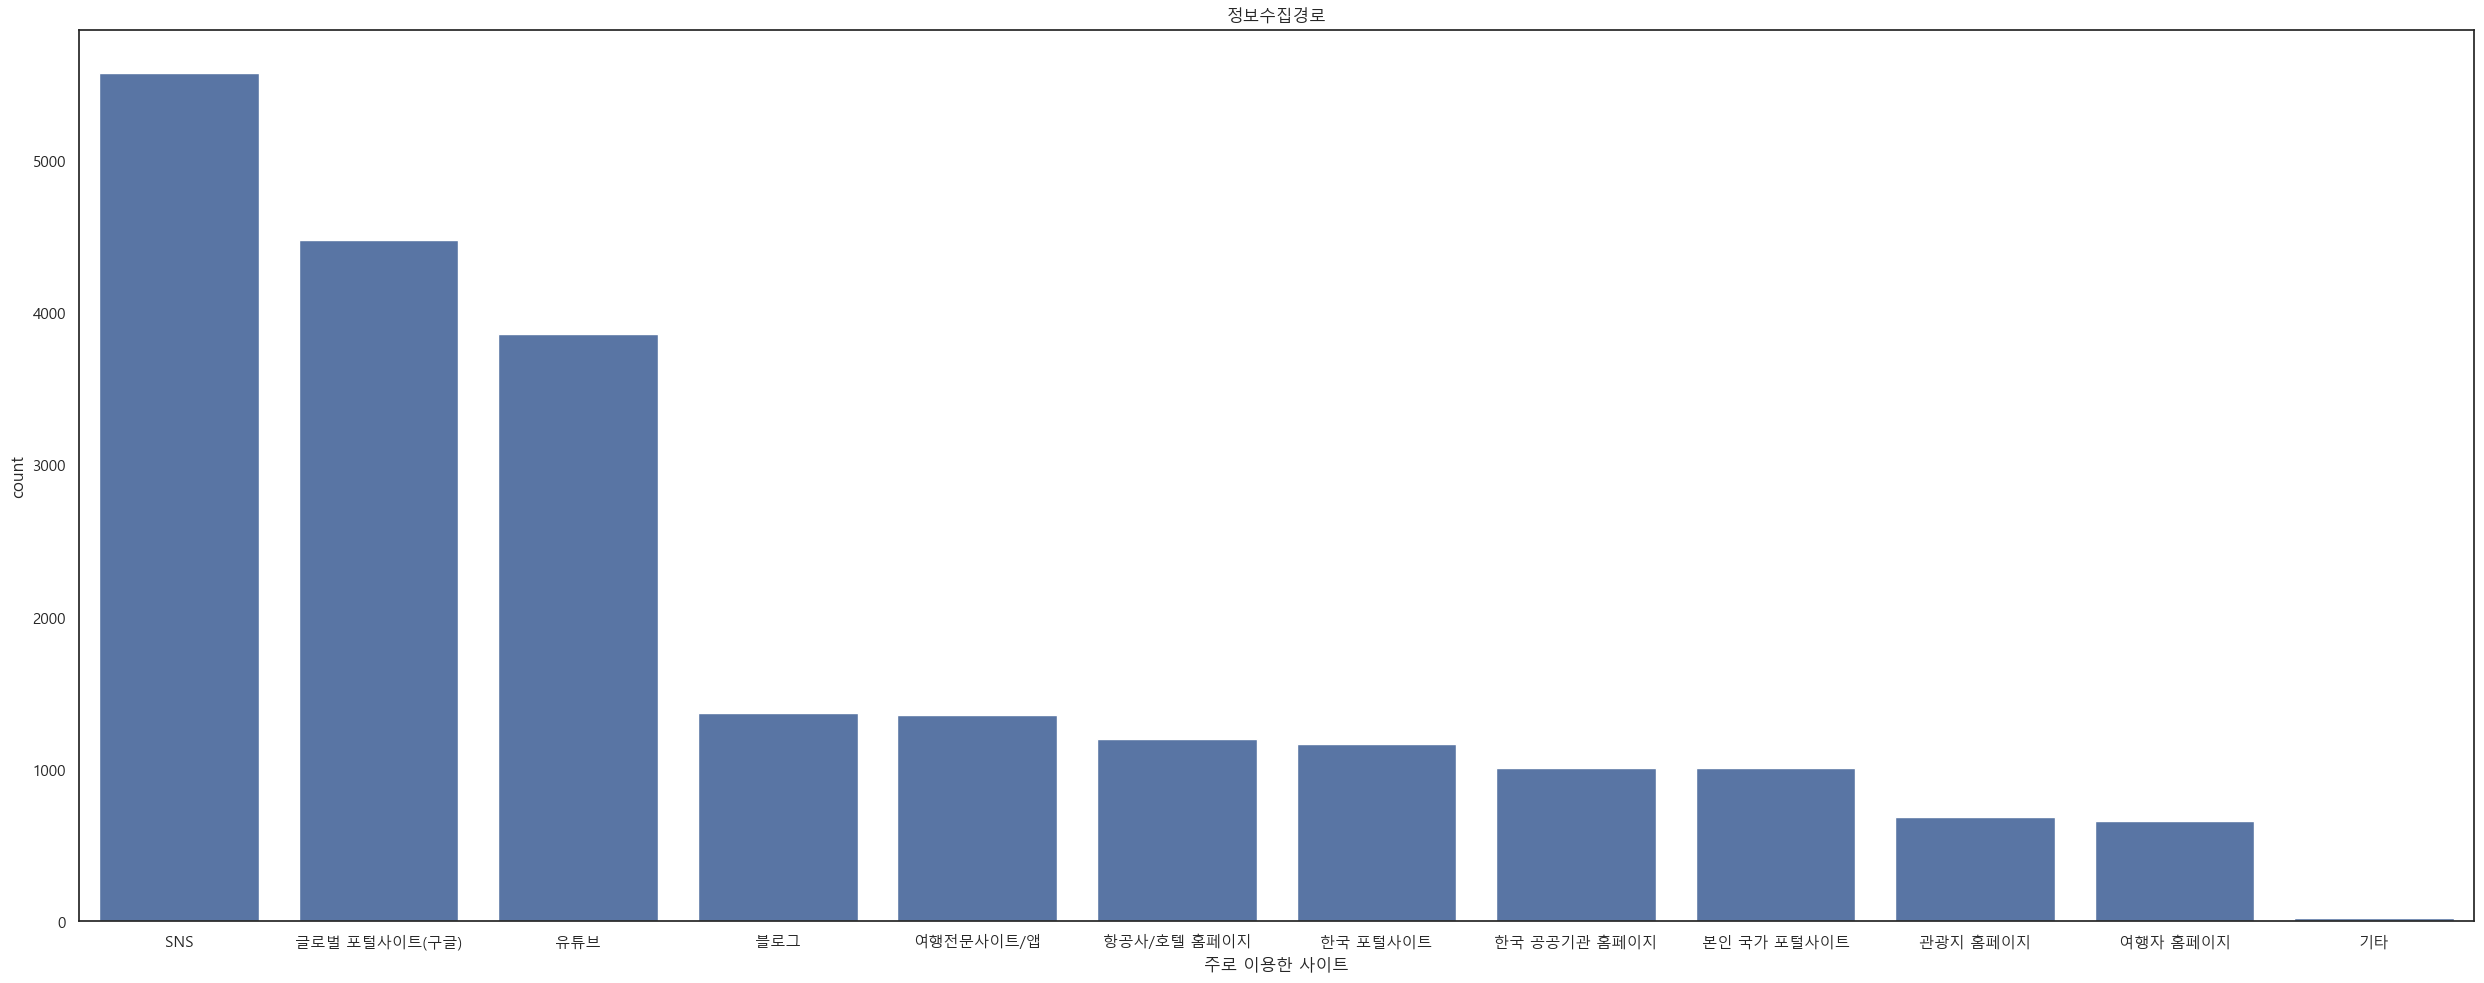

In [6]:
# 주로 이용한 사이트 (collect_site)
# 1	글로벌 포털사이트 (구글 등)
# 2	한국 포털사이트 (네이버, 다음 등)
# 3	본인 국가의 포털사이트 (Yahoo japan, Baidu 등)
# 4	여행전문사이트 또는 앱(트립어드바이저, Hotels.com 숙박 예약 사이트 등)
# 5	소셜미디어 (페이스북, 인스타그램, 트위터, 웨이보 등)
# 6	동영상 사이트 (유튜브 등)
# 7	여행 관련 블로그
# 8	여행사 홈페이지
# 9	개별 관광지 홈페이지
# 10	항공사/호텔 홈페이지
# 11	한국 공공기관 홈페이지(한국관광공사(VisitKorea), 대사관, 무역관 등)
# 12	기타
d34['collect_site'].value_counts()
collect_site_rename = {
    1 : '글로벌 포털사이트(구글)',
    2 : '한국 포털사이트',
    3 : '본인 국가 포털사이트',
    4 : '여행전문사이트/앱',
    5 : 'SNS',
    6 : '유튜브',
    7 : '블로그',
    8 : '여행자 홈페이지',
    9 : '관광지 홈페이지',
    10 : '항공사/호텔 홈페이지',
    11 : '한국 공공기관 홈페이지',
    12 : '기타'
}

d34['collect_site'] = d34['collect_site'].replace(collect_site_rename)
d34['collect_site'].value_counts()

plt.figure(figsize=(25,10))
sns.countplot(x='collect_site', data=d34, order=d34['collect_site'].value_counts().index)
plt.title("정보수집경로", fontname='Malgun Gothic')
plt.xlabel("주로 이용한 사이트", fontname='Malgun Gothic')
plt.tight_layout()
plt.show()

activity
2.0     4944
1.0     3891
3.0     2893
5.0     2097
4.0     1636
7.0     1384
6.0     1288
12.0    1267
11.0    1247
13.0     982
8.0      914
10.0     588
14.0     380
9.0      259
16.0     252
15.0     119
17.0      89
Name: count, dtype: int64


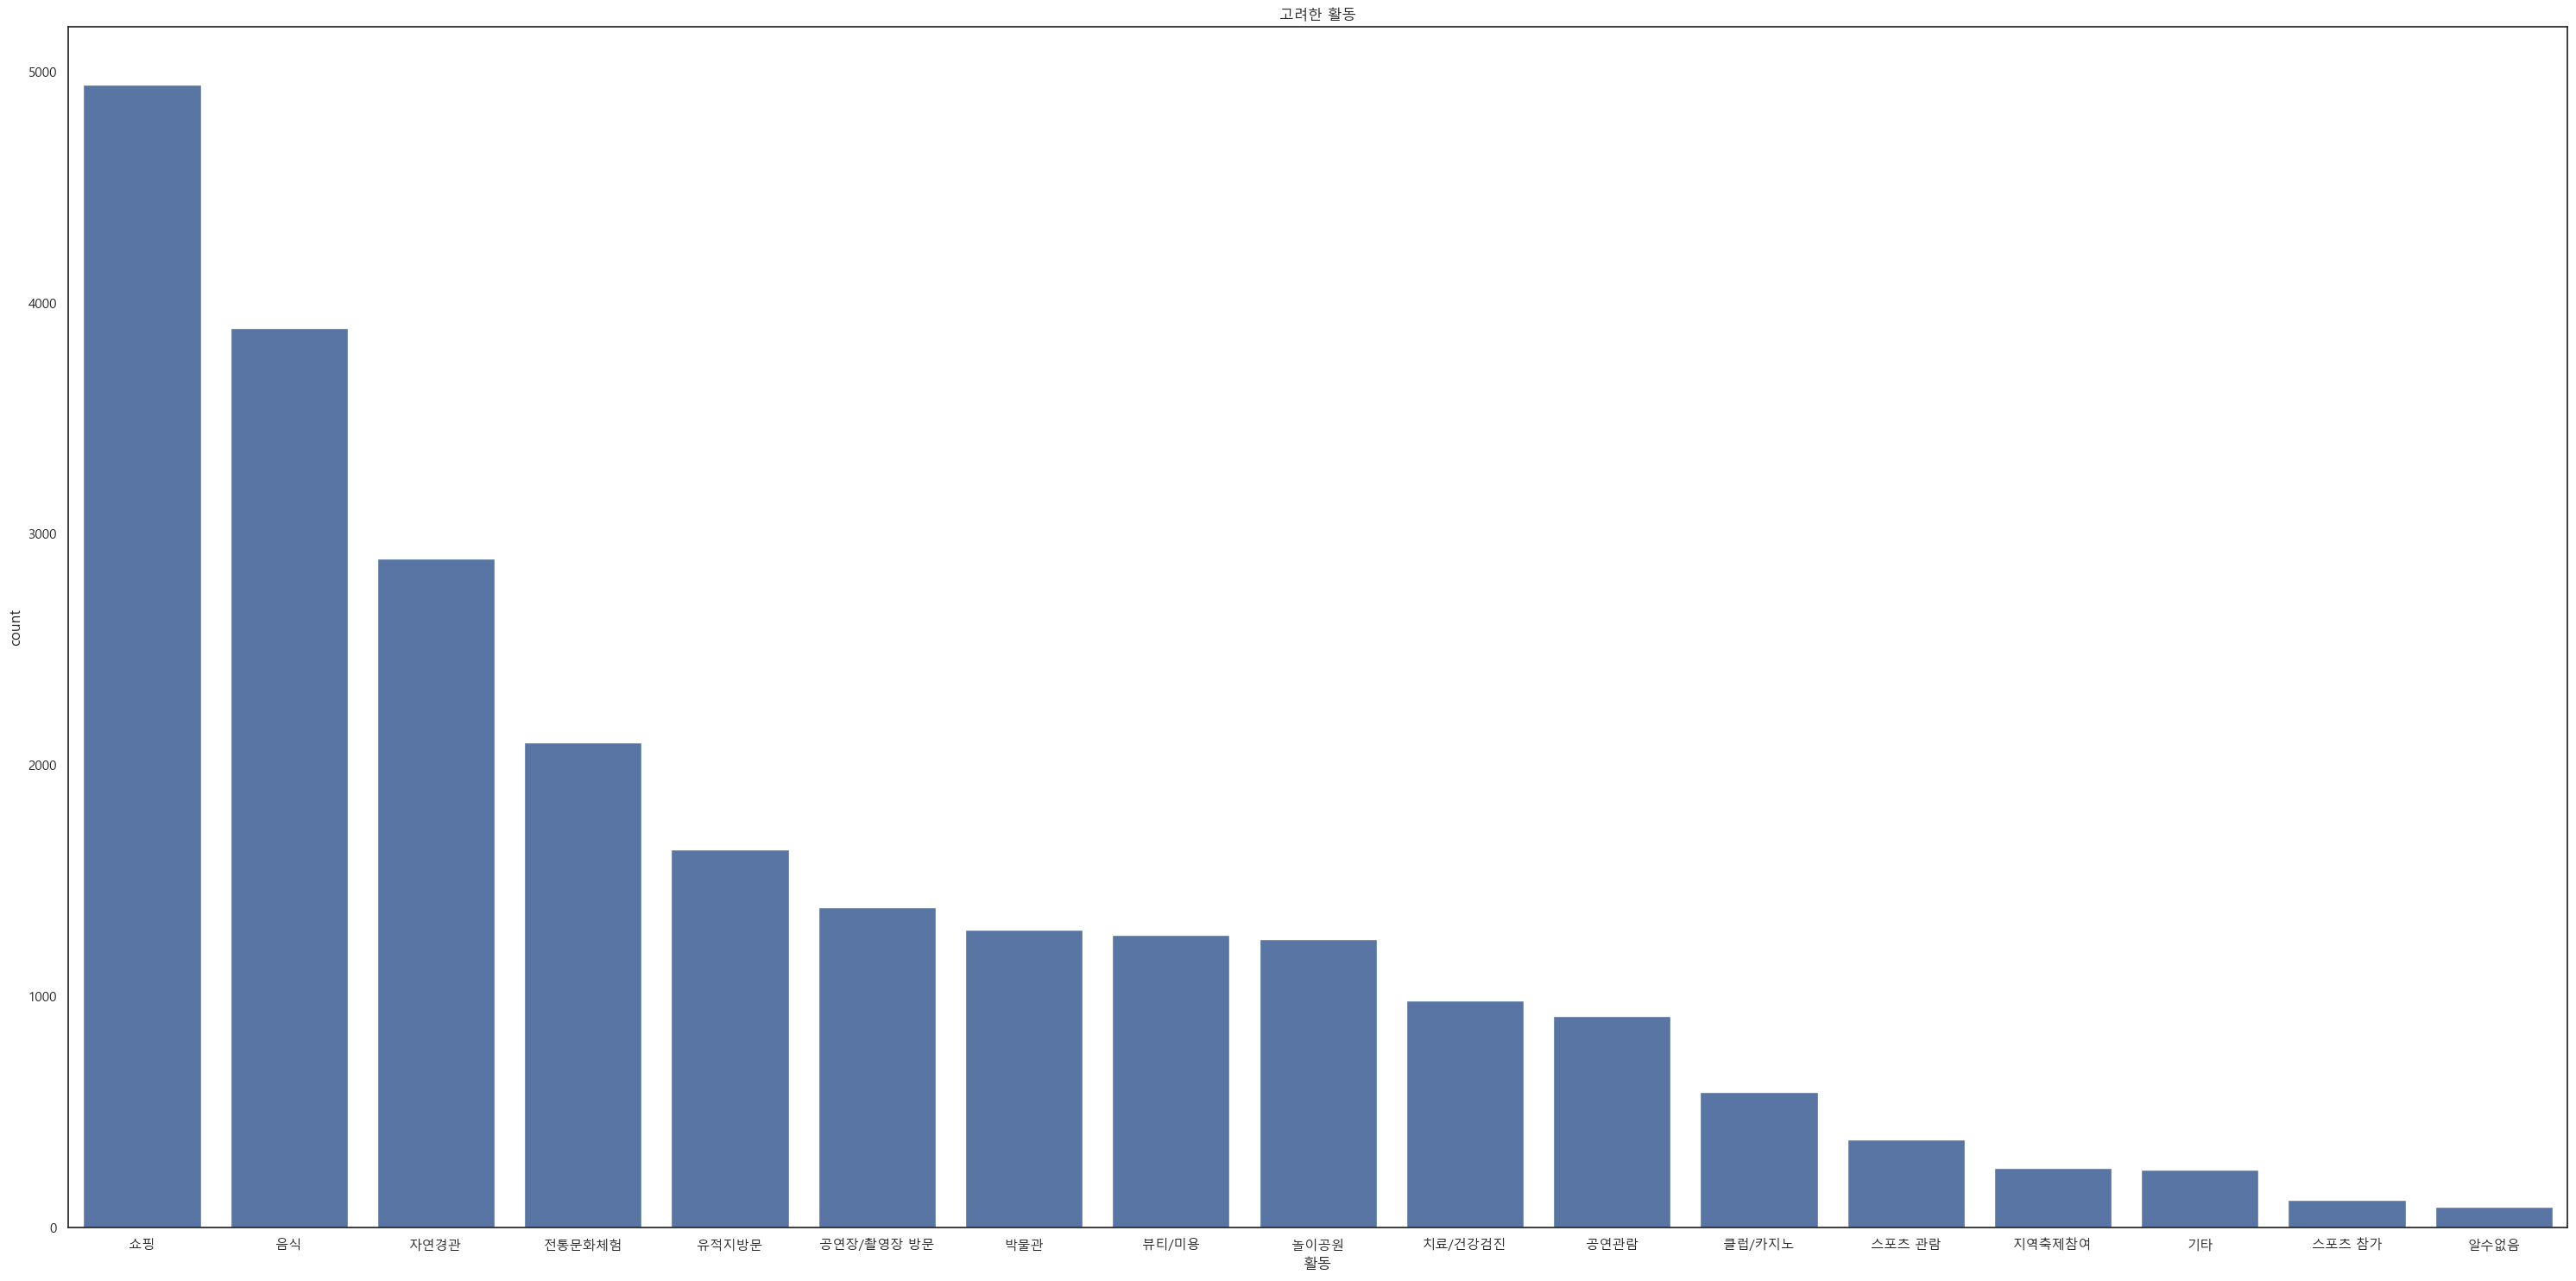

In [7]:
# 고려한 활동
print(d34['activity'].value_counts())

activity_rename = {
    1 : '음식',
    2 : '쇼핑',
    3 : '자연경관',
    4 : '유적지방문',
    5 : '전통문화체험',
    6 : '박물관',
    7 : '공연장/촬영장 방문',
    8 : '공연관람',
    9 : '지역축제참여',
    10 : '클럽/카지노',
    11 : '놀이공원',
    12 : '뷰티/미용',
    13 : '치료/건강검진',
    14 : '스포츠 관람',
    15 : '스포츠 참가',
    16 : '기타',
    17 : '알수없음'
}

d34['activity'] = d34['activity'].replace(activity_rename)
d34['activity'].value_counts()

plt.figure(figsize=(30,15))
sns.countplot(x='activity', data=d34, order=d34['activity'].value_counts().index)
plt.title("고려한 활동", fontname='Malgun Gothic')
plt.xlabel("활동", fontname='Malgun Gothic')
plt.tight_layout()
plt.show()

In [8]:
# 고려했던 활동과 실제로 참여했던 활동이 어떻게 다른지 확인
# 매핑: 변수명 → 번호 (중복 응답했던 사람들 때문에 이렇게 넣어놨구나..)
part_map = {
    "part_food": 1,
    "part_shop": 2,
    "part_nature": 3,
    "part_history": 4,
    "part_tradition": 5,
    "part_gallery": 6,
    "part_kpop": 7,
    "part_performance": 8,
    "part_festival": 9,
    "part_fun": 10,
    "part_entertainment": 11,
    "part_beauty": 12,
    "part_heal": 13,
    "part_sport_view": 14,
    "part_sport_part": 15,
    "part_conference": 16,
    "part_business": 17,
    "part_study": 18,
    "part_etc": 19
}

# participant 컬럼 생성
d34['participant'] = d34.apply(
    lambda row: [part_map[col] for col in part_map if row[col] >= 1],
    axis=1
)

d34['participant'].head()
d34.head()

,Unnamed: 0,id,revisit_num,satis_overall,satis_food,satis_shop,satis_nature,satis_history,satis_tradition,satis_gallery,...,infra,activity,type,main_purpose,interest1,interest2,interest3,year,satisfaction,participant
0,0,6,4,5,5.0,5.0,NaN,NaN,NaN,NaN,...,6.0,음식,1,1,2.0,3.0,4.0,2023,8,"[1, 2, 8]"
1,1,7,4,5,NaN,5.0,5.0,NaN,NaN,NaN,...,3.0,자연경관,1,2,2.0,9.0,7.0,2023,11,"[2, 3, 11]"
2,2,8,2,5,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,5,NaN,NaN,NaN,2023,1,[1]
3,3,10,1,5,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,1,3,NaN,NaN,NaN,2023,15,"[4, 15, 16]"
4,4,11,3,4,5.0,5.0,NaN,5.0,NaN,NaN,...,3.0,쇼핑,1,2,8.0,3.0,7.0,2023,2,"[1, 2, 4]"


              category  code  value  count
0            part_food     1    1.0  23477
1            part_shop     2    2.0  25800
2          part_nature     3    3.0  18146
3         part_history     4    4.0  10401
4       part_tradition     5    5.0  10833
5         part_gallery     6    6.0   8144
6            part_kpop     7    7.0   6051
7     part_performance     8    8.0   2492
8        part_festival     9    9.0   1523
9             part_fun    10   10.0   3141
10  part_entertainment    11   11.0   5068
11         part_beauty    12   12.0   4204
12           part_heal    13   13.0   2610
13     part_sport_view    14   14.0   1279
14     part_sport_part    15   15.0   1079
15     part_conference    16   16.0   1149
16       part_business    17   17.0   3262
17          part_study    18   18.0   3564
18            part_etc    19   16.0      1
19            part_etc    19   17.0      4
20            part_etc    19   19.0   1107


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_23736\3582820942.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='category_kor', y='count', palette='RdBu')


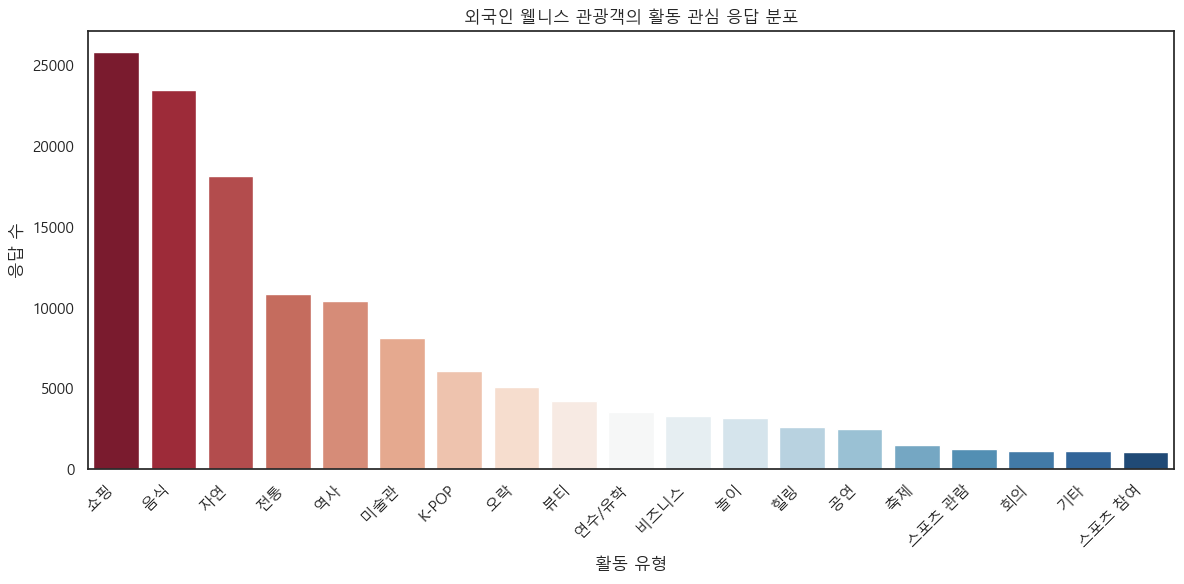

In [9]:
# 참여한 activity 수
import pandas as pd

# 변수명과 번호 매핑
part_map = {
    "part_food": 1,
    "part_shop": 2,
    "part_nature": 3,
    "part_history": 4,
    "part_tradition": 5,
    "part_gallery": 6,
    "part_kpop": 7,
    "part_performance": 8,
    "part_festival": 9,
    "part_fun": 10,
    "part_entertainment": 11,
    "part_beauty": 12,
    "part_heal": 13,
    "part_sport_view": 14,
    "part_sport_part": 15,
    "part_conference": 16,
    "part_business": 17,
    "part_study": 18,
    "part_etc": 19
}

# 빈 리스트에 결과 저장
count_list = []

for col, num in part_map.items():
    count = d34[col].value_counts().sort_index()
    for val, cnt in count.items():
        count_list.append({
            'category': col,
            'code': num,
            'value': val,
            'count': cnt
        })

# 결과 DataFrame 생성
part_counts_df = pd.DataFrame(count_list)

# 보기 좋게 정렬
part_counts_df = part_counts_df.sort_values(by=['code', 'value']).reset_index(drop=True)

# 출력
print(part_counts_df)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 원본 데이터프레임
df = pd.DataFrame({
    "category": ["part_food", "part_shop", "part_nature", "part_history", "part_tradition",
                 "part_gallery", "part_kpop", "part_performance", "part_festival", "part_fun",
                 "part_entertainment", "part_beauty", "part_heal", "part_sport_view", "part_sport_part",
                 "part_conference", "part_business", "part_study", "part_etc", "part_etc", "part_etc"],
    "code": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,19,19],
    "value": [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,16.0,17.0,19.0],
    "count": [23477,25800,18146,10401,10833,8144,6051,2492,1523,3141,5068,4204,2610,1279,1079,1149,3262,3564,1,4,1107]
})

# 동일 category ('part_etc') 중복 합치기
df_grouped = df.groupby(['category']).agg({'count': 'sum'}).reset_index()

# 보기 좋은 한글 라벨 매핑
labels_kor = {
    "part_food": "음식",
    "part_shop": "쇼핑",
    "part_nature": "자연",
    "part_history": "역사",
    "part_tradition": "전통",
    "part_gallery": "미술관",
    "part_kpop": "K-POP",
    "part_performance": "공연",
    "part_festival": "축제",
    "part_fun": "놀이",
    "part_entertainment": "오락",
    "part_beauty": "뷰티",
    "part_heal": "힐링",
    "part_sport_view": "스포츠 관람",
    "part_sport_part": "스포츠 참여",
    "part_conference": "회의",
    "part_business": "비즈니스",
    "part_study": "연수/유학",
    "part_etc": "기타"
}
df_grouped['category_kor'] = df_grouped['category'].map(labels_kor)

# 카테고리별 응답 수 정렬
df_sorted = df_grouped.sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='category_kor', y='count', palette='RdBu')

plt.title('외국인 웰니스 관광객의 활동 관심 응답 분포')
plt.xlabel('활동 유형')
plt.ylabel('응답 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# wellness 컬럼 생성
d34['wellness'] = ((d34['part_beauty'] == 12) | (d34['part_nature'] == 3)).astype(int)
print(d34['wellness'].value_counts())

wellness
1    19772
0    12640
Name: count, dtype: int64


In [11]:
# 소비 (general) 
# 코딩된 값들이 있어야 하는데, 숫자로 나와서 어떠한 단위를 기준으로 정했는지 알 수 없음. 
# 분석 하지 않고 넘겨야지
d34.head(3)


,Unnamed: 0,id,revisit_num,satis_overall,satis_food,satis_shop,satis_nature,satis_history,satis_tradition,satis_gallery,...,activity,type,main_purpose,interest1,interest2,interest3,year,satisfaction,participant,wellness
0,0,6,4,5,5.0,5.0,NaN,NaN,NaN,NaN,...,음식,1,1,2.0,3.0,4.0,2023,8,"[1, 2, 8]",0
1,1,7,4,5,NaN,5.0,5.0,NaN,NaN,NaN,...,자연경관,1,2,2.0,9.0,7.0,2023,11,"[2, 3, 11]",1
2,2,8,2,5,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1,5,NaN,NaN,NaN,2023,1,[1],0


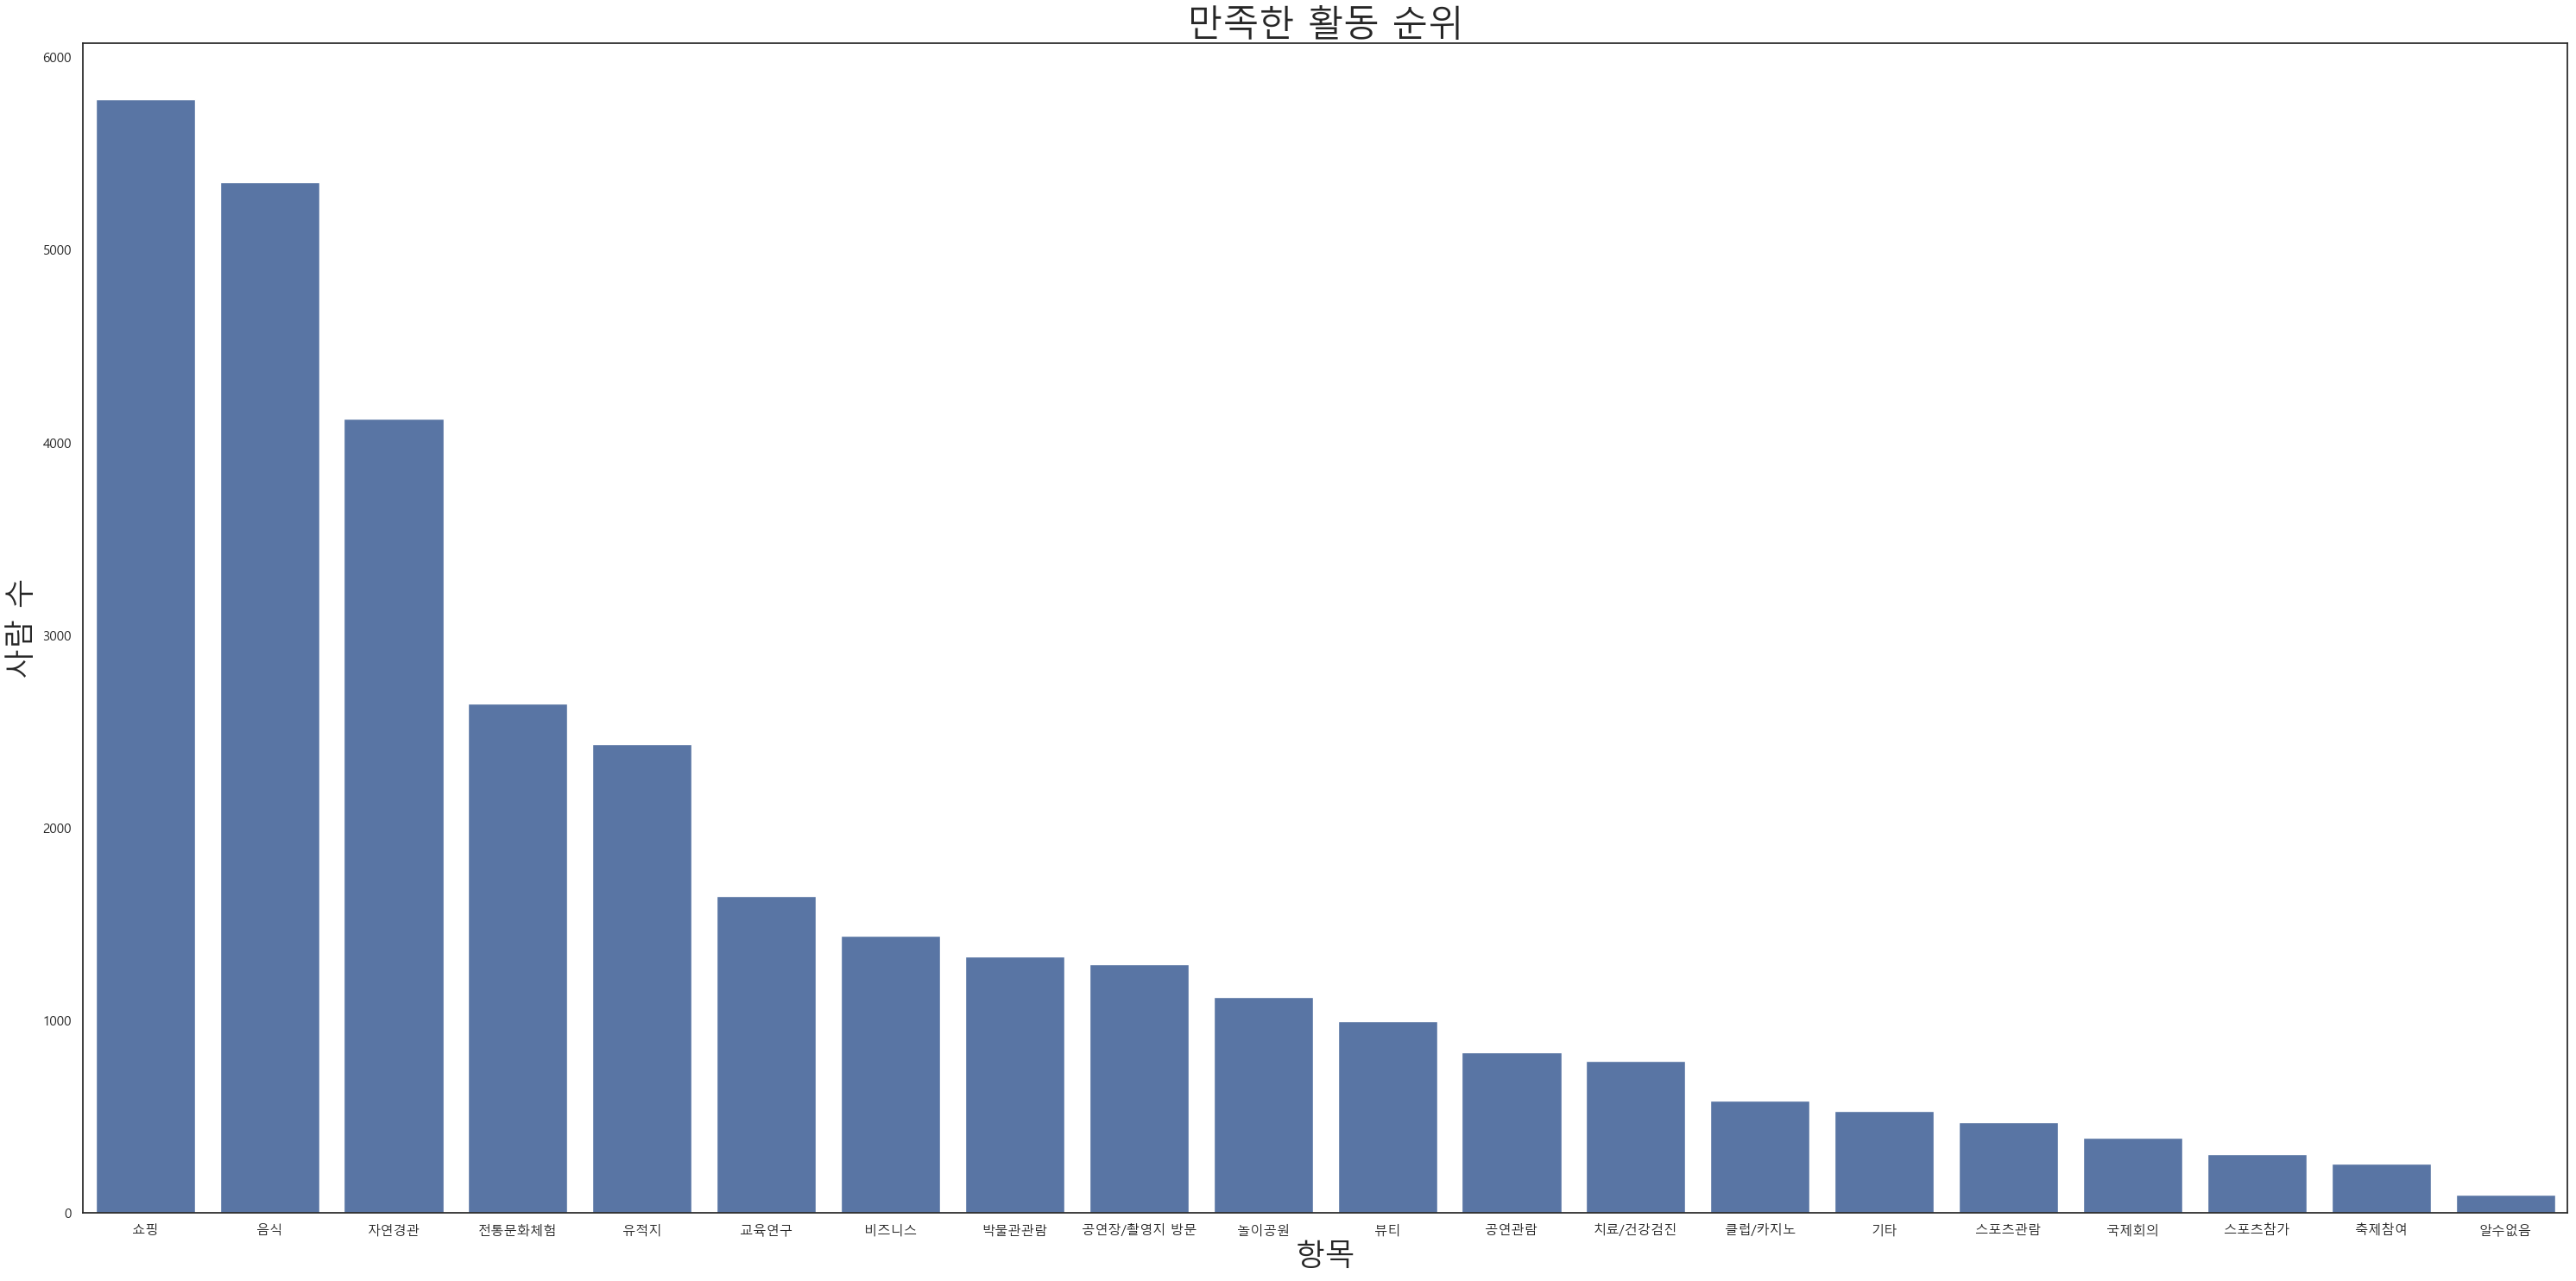

In [12]:
# 만족한 활동 순위 (satisfaction)
d34['satisfaction'].value_counts()

satis_rename = {
    1: '음식',
    2: '쇼핑',
    3: '자연경관',
    4: '유적지',
    5: '전통문화체험',
    6: '박물관관람',
    7: '공연장/촬영지 방문',
    8: '공연관람',
    9: '축제참여',
    10: '클럽/카지노',
    11: '놀이공원',
    12: '뷰티',
    13: '치료/건강검진',
    14: '스포츠관람',
    15: '스포츠참가',
    16: '국제회의',
    17: '비즈니스',
    18: '교육연구',
    19: '기타',
    20: '알수없음'
}

d34['satisfaction'] = d34['satisfaction'].replace(satis_rename)
d34['satisfaction'].value_counts()

plt.figure(figsize=(30,15))
sns.countplot(x='satisfaction', data=d34, order=d34['satisfaction'].value_counts().index)
plt.title("만족한 활동 순위", fontsize=30)
plt.xlabel("항목", fontsize=25)
plt.ylabel("사람 수", fontsize=25)
plt.tight_layout()
plt.show()


In [20]:
# 만족도 점수
# print(d34['satis_nature'].value_counts())
# print(d34['satis_beauty'].value_counts())

satis_cols = [
    'satis_food', 'satis_shop', 'satis_nature', 'satis_history', 
    'satis_gallery', 'satis_tradition', 'satis_kpop', 'satis_performance',
    'satis_festival', 'satis_fun', 'satis_entertainment', 'satis_beauty', 'satis_heal',
    'satis_sport_view', 'satis_sport_part', 'satis_immigration',
    'satis_safe', 'satis_expense', 'satis_sleep', 'satis_transportation',
    'satis_map', 'satis_guide_public', 'satis_mobile', 'satis_guide_digital',
    'satis_guide_private', 'satis_communication'
]

# 결과 저장용 딕셔너리
satis_avg_result = {}

# 각 항목별로 평균 점수 계산
for col in satis_cols:
    vc = d34[col].value_counts()
    total_score = sum(score * count for score, count in vc.items())
    total_people = vc.sum()
    avg_score = total_score / total_people if total_people > 0 else None
    satis_avg_result[col] = round(avg_score, 2)

# 결과를 데이터프레임으로 정리
satis_avg_df = pd.DataFrame.from_dict(satis_avg_result, orient='index', columns=['avg_score']).sort_values(by='avg_score', ascending=False)

rename_dict = {
    'satis_mobile': '모바일/인터넷편의',
    'satis_guide_digital': '디지털관광정보',
    'satis_guide_private': '여행사/가이드',
    'satis_nature': '자연환경',
    'satis_tradition': '전통문화체험',
    'satis_history': '역사유산',
    'satis_heal': '치료/건강검진',
    'satis_gallery': '박물관/미술관',
    'satis_kpop': 'K-POP',
    'satis_guide_public': '관광안내서비스',
    'satis_performance': '공연',
    'satis_sport_view': '스포츠관람',
    'satis_food': '음식',
    'satis_shop': '쇼핑',
    'satis_beauty': '뷰티',
    'satis_festival': '축제',
    'satis_sport_part': '스포츠참여',
    'satis_entertainment': '엔터테인먼트',
    'satis_fun': '유흥',
    'satis_transportation': '교통',
    'satis_expense': '비용',
    'satis_immigration': '입국절차',
    'satis_sleep': '숙박',
    'satis_safe': '안전',
    'satis_map': '지도정보',
    'satis_communication': '언어소통'
}

# 인덱스 이름 변경
satis_avg_df_renamed = satis_avg_df.rename(index=rename_dict)
print(satis_avg_df_renamed)

           avg_score
모바일/인터넷편의       4.87
디지털관광정보         4.86
여행사/가이드         4.83
자연환경            4.69
전통문화체험          4.67
역사유산            4.66
치료/건강검진         4.65
박물관/미술관         4.64
K-POP           4.64
관광안내서비스         4.64
공연              4.63
음식              4.58
쇼핑              4.58
스포츠관람           4.58
뷰티              4.57
축제              4.57
스포츠참여           4.56
엔터테인먼트          4.55
유흥              4.54
교통              4.49
비용              4.48
입국절차            4.43
숙박              4.40
안전              4.37
지도정보            4.37
언어소통            4.19


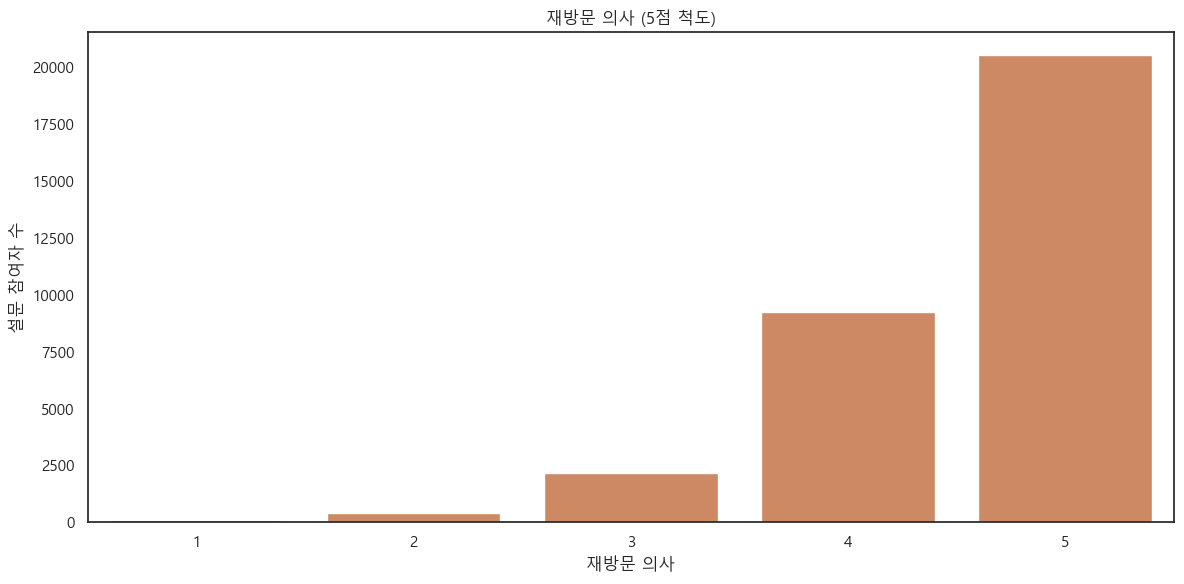

In [ ]:
# revisit_think
d34['revisit_think'].value_counts()

sns.countplot(x='revisit_think', data=d34)
sns.countplot(x='revisit_think', data=d34)
plt.title("재방문 의사 (5점 척도)")
plt.ylabel("설문 참여자 수")
plt.xlabel("재방문 의사")
plt.tight_layout()
plt.show()

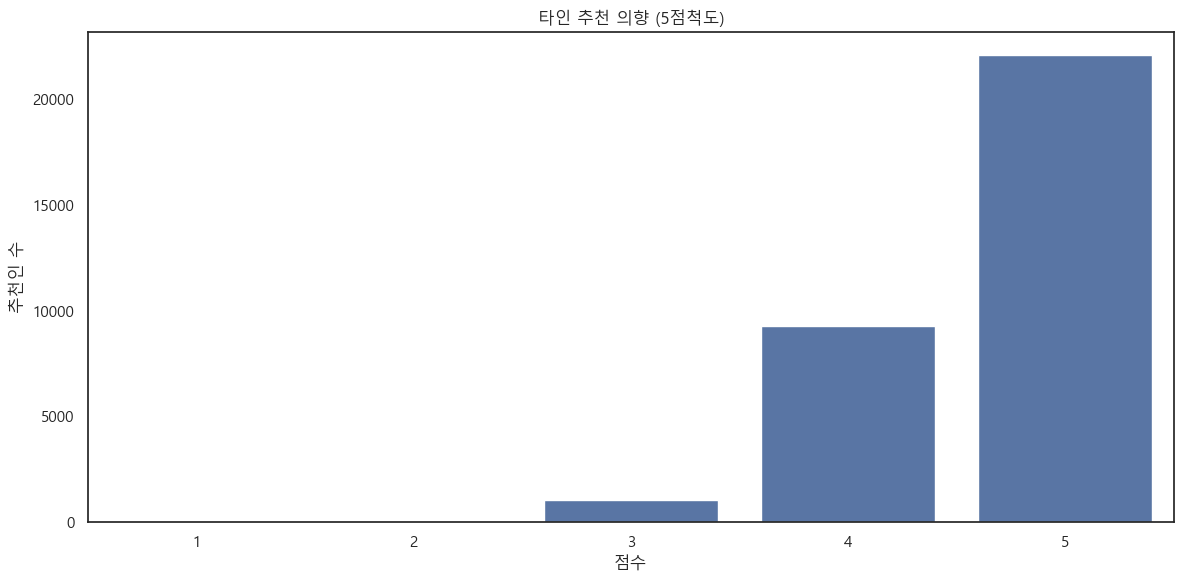

In [ ]:
# recommend_think
d34['recommend_think'].value_counts()

sns.countplot(x='recommend_think', data=d34)
plt.title("타인 추천 의향 (5점척도)")
plt.xlabel("점수")
plt.ylabel("추천인 수")
plt.tight_layout()
plt.show()

month
10    2770
2     2721
8     2713
11    2710
6     2696
1     2695
5     2692
3     2691
12    2685
4     2684
7     2678
9     2677
Name: count, dtype: int64
season
가을    8157
겨울    8101
여름    8087
봄     8067
Name: count, dtype: int64


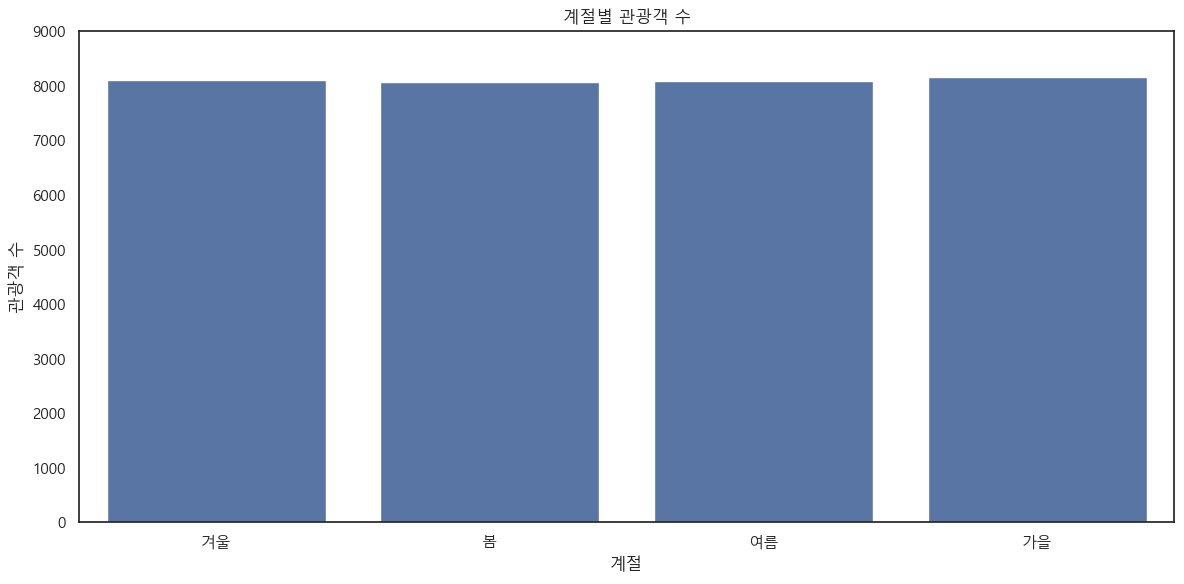

In [ ]:
# month -> 월별로도
print(d34['month'].value_counts())

# season -> 계절별로도 큰 차이 없음..? 진짜로?
def season(month):
    if month in [3, 4, 5] :
        return '봄'
    elif month in [6, 7, 8] :
        return '여름'
    elif month in [9, 10, 11]: 
        return '가을'
    elif month in [12, 1, 2] : 
        return '겨울'
    else :
        return 'unknown'

d34['season'] = d34['month'].apply(season)
print(d34['season'].value_counts())

sns.countplot(x='season', data=d34)
plt.title("계절별 관광객 수")
plt.xlabel("계절")
plt.ylabel("관광객 수")
plt.ylim(0, 9000)
plt.tight_layout()
plt.show()


year
2024    16216
2023    16196
Name: count, dtype: int64


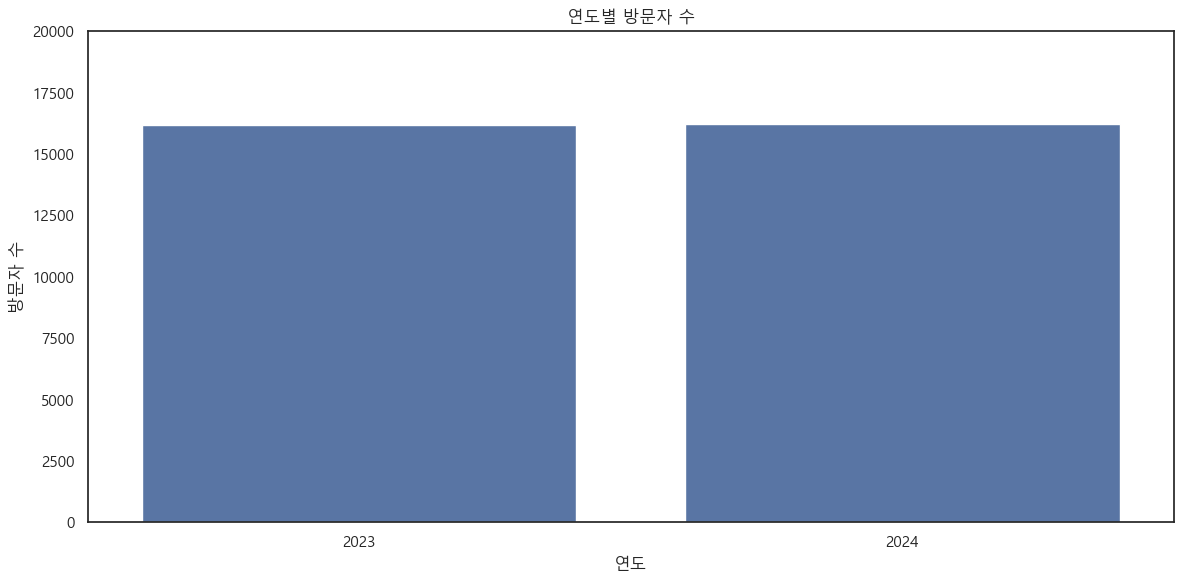

In [ ]:
# year
print(d34['year'].value_counts())

sns.countplot(x='year', data=d34)
plt.title("연도별 방문자 수")
plt.xlabel("연도")
plt.ylabel("방문자 수")
plt.ylim(0, 20000)
plt.tight_layout()
plt.show()

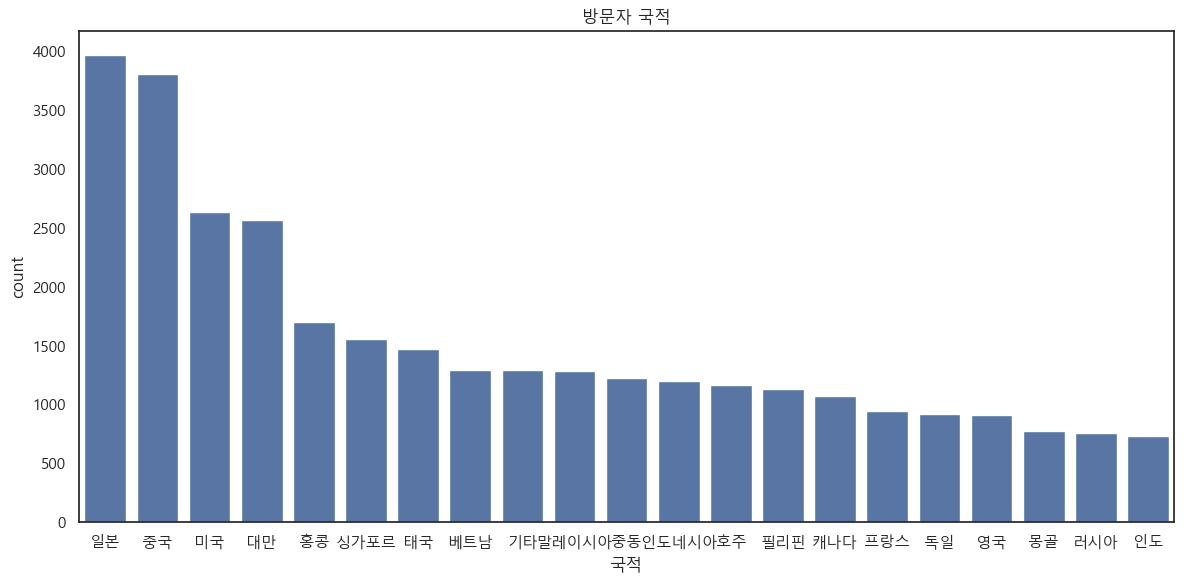

In [ ]:
# nationality
nation_rename = {
    1: '중국',
    2: '일본',
    3: '대만',
    4: '미국',
    5: '홍콩',
    6: '태국',
    7: '베트남',
    8: '말레이시아',
    9: '필리핀',
    10: '싱가포르',
    11: '러시아',
    12: '중동',
    13: '인도네시아',
    14: '캐나다',
    15: '호주',
    16: '영국',
    17: '몽골',
    18: '독일',
    19: '프랑스',
    20: '인도',
    97: '기타'
}
d34['nationality'] = d34['nationality'].replace(nation_rename)
d34['nationality'].value_counts()

sns.countplot(x='nationality', data=d34, order=d34['nationality'].value_counts().index)
plt.title('방문자 국적')
plt.xlabel('국적')
plt.tight_layout()
plt.show()

interest1
신규 탐방       5748
과거 경험 좋음    3950
한국 콘텐츠      3772
전통문화체험      2438
경비 적합       1575
한국 행사 참여    1574
거리 적합       1513
관광지 정보      1196
기타          1113
가성비 여행       732
항공노선 양호      619
Name: count, dtype: int64
interest2
전통문화체험      3592
경비 적합       2553
한국 콘텐츠      2463
거리 적합       2215
관광지 정보      1678
신규 탐방       1480
과거 경험 좋음    1383
한국 행사 참여    1028
가성비 여행      1000
항공노선 양호      893
기타           204
Name: count, dtype: int64
interest3
전통문화체험      2608
관광지 정보      1953
경비 적합       1805
한국 콘텐츠      1732
거리 적합       1631
가성비 여행      1104
신규 탐방        931
과거 경험 좋음     828
항공노선 양호      720
한국 행사 참여     495
기타           230
Name: count, dtype: int64


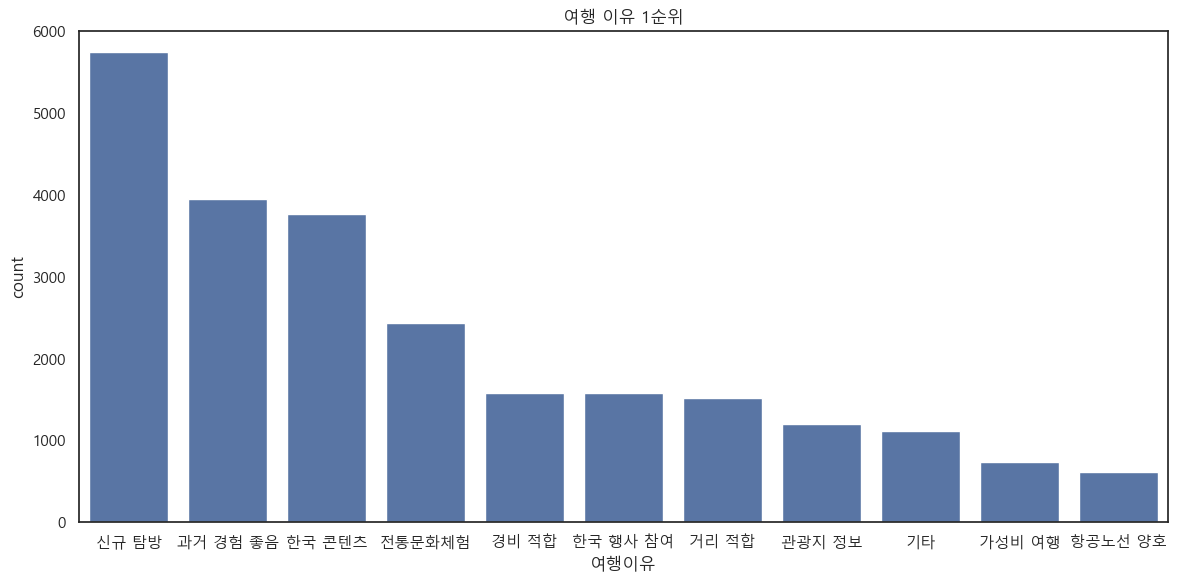

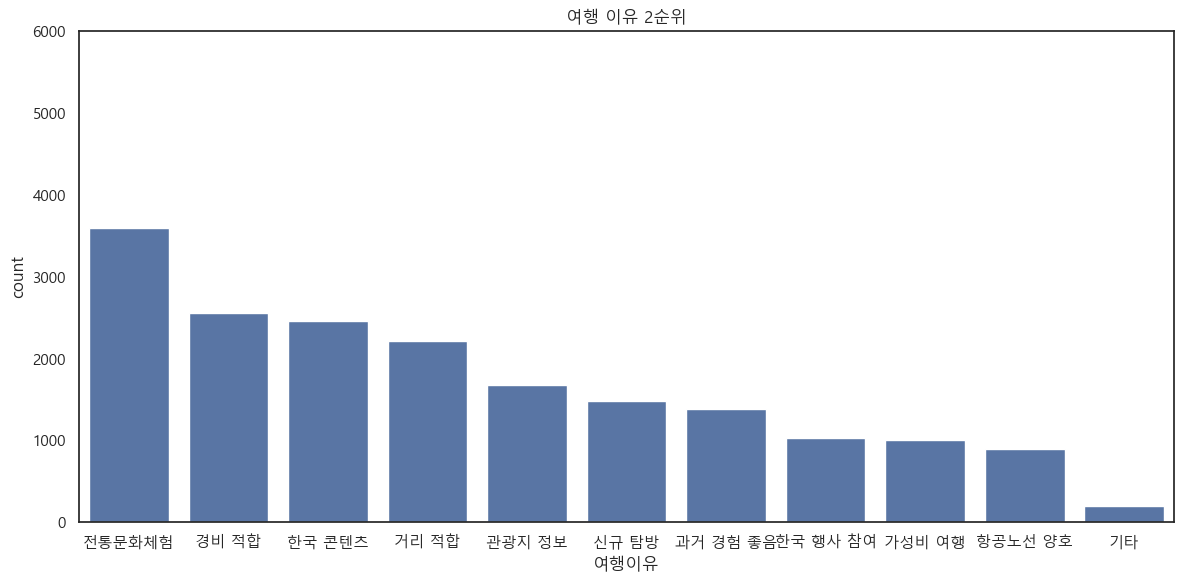

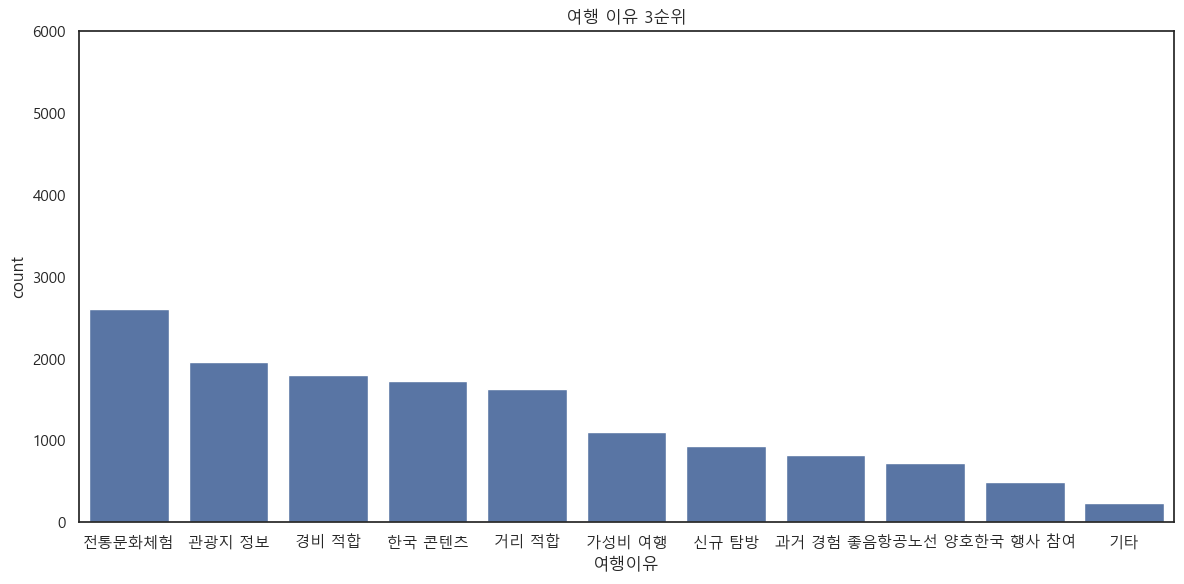

In [ ]:
# 한국 여행에 관심 있었던 이유
# interest1, interest2, interest3

d34['interest1'].value_counts()
interest_rename = {
    1: "신규 탐방",
    2: "과거 경험 좋음",
    3: "한국 행사 참여",
    4: "경비 적합",
    5: "거리 적합",
    6: "항공노선 양호",
    7: "한국 콘텐츠",
    8: "전통문화체험",
    9: "관광지 정보",
    10: "가성비 여행",
    11: "기타"
}

d34['interest1'] = d34['interest1'].replace(interest_rename)
print(d34['interest1'].value_counts())

d34['interest2'] = d34['interest2'].replace(interest_rename)
print(d34['interest2'].value_counts())

d34['interest3'] = d34['interest3'].replace(interest_rename)
print(d34['interest3'].value_counts())


sns.countplot(x='interest1', data=d34, order=d34['interest1'].value_counts().index)
plt.title("여행 이유 1순위", fontname='Malgun Gothic')
plt.xlabel("여행이유")
plt.ylim(0, 6000)
plt.tight_layout()
plt.show()

sns.countplot(x='interest2', data=d34, order=d34['interest2'].value_counts().index)
plt.title("여행 이유 2순위", fontname='Malgun Gothic')
plt.xlabel("여행이유")
plt.ylim(0, 6000)
plt.tight_layout()
plt.show()

sns.countplot(x='interest3', data=d34, order=d34['interest3'].value_counts().index)
plt.title("여행 이유 3순위", fontname='Malgun Gothic')
plt.xlabel("여행이유")
plt.ylim(0, 6000)
plt.tight_layout()
plt.show()